In [9]:
import pandas as pd
import numpy as np
import pickle
import random

import matplotlib.pyplot as plt
from numpy import random
import random
from sklearn.metrics import euclidean_distances
from sklearn.cluster import DBSCAN
import warnings
warnings.simplefilter("ignore")

In [8]:
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [12]:
db = DBSCAN(eps=0.6, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

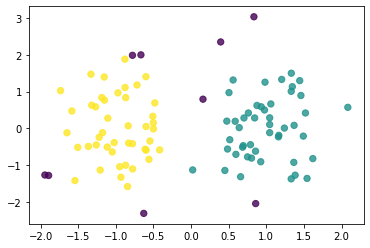

In [13]:
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()

 ### My realization

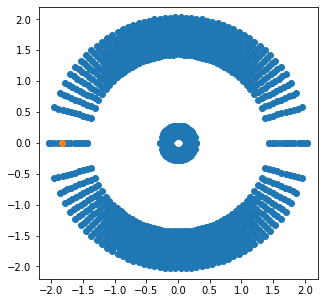

In [91]:
x = np.array([[0, 0]])
y = np.array([[0, 0]])
plt.figure(figsize=(5, 5))
for i in range(20, 30):
    j = i / 15
    a1 = np.linspace(-j-0.1, j+0.1, 50)
    b1 = ((j+0.1)**2 - a1**2)**0.5
    b2 = -(((j+0.1)**2) - a1**2)**0.5
    
    a1 = a1.reshape(-1, 1)
    b1 = b1.reshape(-1, 1)
    b2 = b2.reshape(-1, 1)
    
    x1 = np.concatenate([a1, b1], axis=1)
    x2 = np.concatenate([a1, b2], axis=1)
    x = np.concatenate([x, x1, x2], axis=0)
#     print(x[0])
    
for i in range(1, 10):
    j = i / 50
    a1 = np.linspace(-j-0.1, j+0.1, 30)
    b1 = ((j+0.1)**2 - a1**2)**0.5
    b2 = -(((j+0.1)**2) - a1**2)**0.5
    
    a1 = a1.reshape(-1, 1)
    b1 = b1.reshape(-1, 1)
    b2 = b2.reshape(-1, 1)
    
    y1 = np.concatenate([a1, b1], axis=1)
    y2 = np.concatenate([a1, b2], axis=1)
    y = np.concatenate([y, y1, y2], axis=0)

x = np.concatenate([x[1:], y[1:]])
del y

c = 600
plt.scatter(x[:, 0], x[:, 1], marker='o')
plt.scatter(x[c, 0], x[c, 1], marker='o')

plt.xlim([-2.2, 2.2])
plt.ylim([-2.2, 2.2])
plt.show()

In [101]:
x1 = []
for i in x:
    i = i.reshape(1, -1)
    if [list(_) for _ in i][0] not in [list(_) for _ in x1]:
        x1.append([list(_) for _ in i][0])
x = np.array(x1)

In [96]:
eps = 0.15
min_pts = 3

clusters = {}
m = 0
processed = np.array([0, 0]).reshape(1, -1)
outliers = np.array([0, 0]).reshape(1, -1)

for i in x:
    i = i.reshape(1, -1)
    if [list(_) for _ in i][0] in [list(_) for _ in processed]:  # if i in processed
        continue
    processed = np.concatenate([processed, i])
    ed = euclidean_distances(x, i)
    vicinity = x[ed.flatten()<eps].copy().tolist()
    if len(vicinity) < min_pts:
        outliers = np.concatenate([outliers, i])
    else:
        m += 1
        if m > 9:
            break

        clusters[m] = np.array([0, 0]).reshape(1, -1)
        clusters[m] = np.concatenate([clusters[m], i])
        vicinity.remove(vicinity[-1])
        g = [list(_) for _ in clusters[m]]
        g.remove(list([0, 0]))
        clusters[m] = np.array(g)
        for j in vicinity:
            j = np.array(j).reshape(1, -1)
            if [list(_) for _ in j][0] in [list(_) for _ in outliers]:  # if j in outliers  
                clusters[m] = np.concatenate([clusters[m], j])
                vicinity.remove(vicinity[-1])
                g = [list(_) for _ in outliers]
                g.remove(list(j[0]))
                outliers = np.array(g)
                
            if [list(_) for _ in j][0] in [list(_) for _ in processed]:
                continue
            processed = np.concatenate([processed, j.reshape(1, -1)])
            clusters[m] = np.concatenate([clusters[m], j])
            ed = euclidean_distances(x, j.reshape(1, -1))

            secondary_vicinity = x[ed.flatten()<eps].copy().tolist()
            if len(secondary_vicinity) >= min_pts:
                vicinity.extend(secondary_vicinity)

(-3, 3)

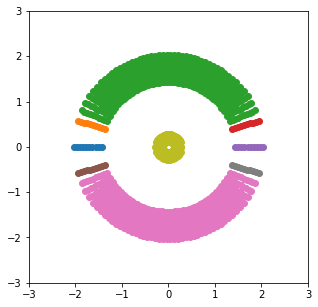

In [99]:
plt.figure(figsize=(5, 5))

for i in clusters:
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], marker='o')
plt.xlim([-3, 3])
plt.ylim([-3, 3])

Yeah😎😎😎😎😎